In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
sys.path.append("../src")
import os
from src.DS_Generator import DataSet_Generator
from src.model_evaluation import mean_average_precision
from data_augmentation import *
from Visualizer import *
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
from util import *
import datetime
import tqdm

In [2]:
def eval_seed(df):
    split_up_dfs = [df[df["which_set"]==x] for x in ["val_ds","test_ds","train_ds"]]
    number_of_species =[ len(set(df["species"])) for df in split_up_dfs]
    return all([counts == 30 for counts in number_of_species]) 

In [3]:
def find_good_seed():
    seed = 0
    
    
    while True:
        sys.stdout = open(os.devnull, 'w')
        train_ds, val_ds,test_ds,df = DataSet_Generator().generate_species_data(TRAIN_SPECIES_DF,augment=1,
                                                                            batch_size=64,
                                                                            factor_of_validation_ds=0.1,
                                                                            factor_of_test_ds=0.1,
                                                                            seed=seed,
                                                                        return_eval_data=True)
           
        sys.stdout = sys.__stdout__
        if eval_seed(df):
            return seed,df
        else:
            seed+=1

In [4]:
seed, seed_df = find_good_seed()

Checking seed 0


In [7]:
seed

5

In [11]:
def get_sorted_species_counts(df,normalize=True):
    series = df["species"].value_counts(normalize=normalize)
    return series.sort_index().values

def compare_relative_differences(org_data,new_data):
    weithted_diffs = np.abs(org_data-new_data)/org_data
    return weithted_diffs

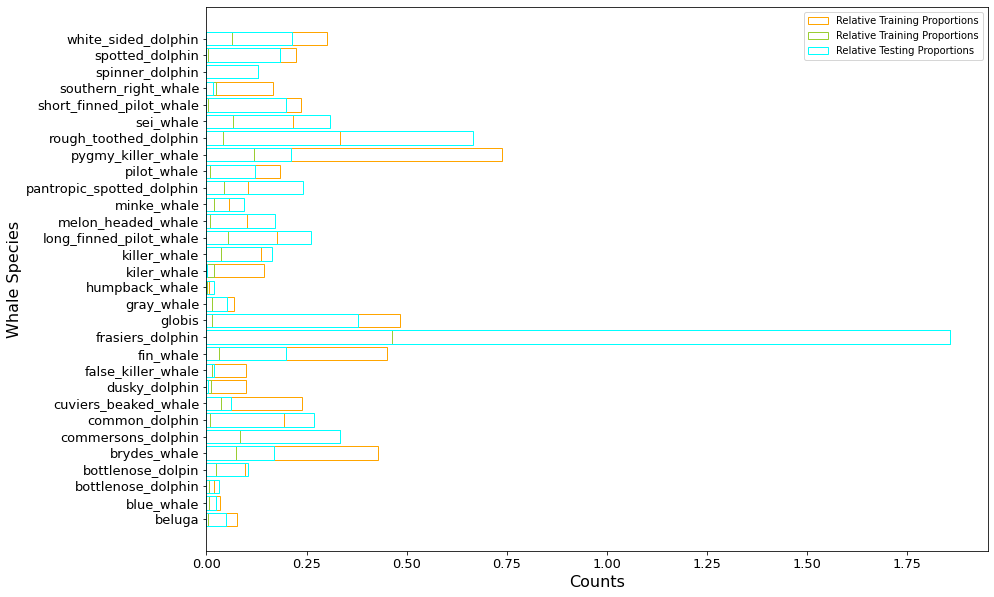

In [26]:
def eval_good_seed(seed_df):
    df = seed_df
    val_df, test_df, train_df = [df[df["which_set"]==x] for x in ["val_ds","test_ds","train_ds"]]
    
    val_dis,test_dis , train_dis,org_dis =  [ get_sorted_species_counts(df,normalize=True) for df in [val_df, test_df, train_df,df]]

    whale_index = seed_df["species"].value_counts().sort_index().index.tolist()
    
    rel_train_difs, rel_val_difs, rel_test_difs = [compare_relative_differences(org_dis, arr)for arr in [ val_dis , train_dis,test_dis]]
    
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.barh(whale_index, rel_train_difs, label="Relative Training Proportions", fill=False,
            edgecolor='orange')
    ax.barh(whale_index, rel_val_difs, label="Relative Training Proportions", fill=False,
            edgecolor='yellowgreen')
    ax.barh(whale_index, rel_test_difs, label="Relative Testing Proportions", fill=False, edgecolor='cyan')

    plt.legend()
    plt.xticks(rotation=0)
    plt.tick_params(axis='y', labelsize=13)
    plt.tick_params(axis='x', labelsize=13)
    plt.ylabel('Whale Species', fontsize=16)
    plt.xlabel('Counts', fontsize=16)
    plt.show()

eval_good_seed(seed_df)

So seed 5 it is